In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer as timer

# GATHERING DATA 

In [2]:
###  First Data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# Showing the Data 
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
### Second Data From Image
#Download the data from url link that already provided
tsv_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_req = requests.get(tsv_url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image_req.content)

#Showing the data:
image_twitter = pd.read_csv('image_predictions.tsv', sep = '\t')
image_twitter.head(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [4]:
#Third Data From Twitter API
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'bpCrEHSfzmOxrivBj3ZZSUeS2'
consumer_secret = 'wGJcz98kDRT7VOJs8iKndTWBzGQDUrtJQjvcu9QGtBi29VQocl'
access_token = '1347824265358282757-0QwFRk7ixb0yy4u3BVofX5vW2aV2b2'
access_secret = 'rFmU6dBrjeorOMpumujG2zPqhGCAVRxoJhr3M0SfB7XEq'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
api.me()


User(_api=<tweepy.api.API object at 0x13141460>, _json={'id': 1347824265358282757, 'id_str': '1347824265358282757', 'name': 'Salman96', 'screen_name': 'Salman974504254', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Sat Jan 09 08:35:34 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal

In [5]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [6]:
tweet_json_file = 'tweet_json.txt'

In [7]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
tweet_data = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

tweet_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7363,35021
1,892177421306343426,5490,30332
2,891815181378084864,3630,22799
3,891689557279858688,7535,38271
4,891327558926688256,8131,36543


Gather Data:
1. twitter_archive dataframe contains basic tweet info.
2. image_twitter daframe contains image from tweet.
3. tweet_data dataframe contains tweet information such as : tweet_id, retweet_count and favorite count.

# ASSESS
Note: issues found are documented at the end of the assessment section

### Visual Assessment

In [8]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
twitter_archive.shape

(2356, 17)

In [12]:
image_twitter.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_twitter.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
image_twitter.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [15]:
image_twitter.shape

(2075, 12)

In [16]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7363,35021
1,892177421306343426,5490,30332
2,891815181378084864,3630,22799
3,891689557279858688,7535,38271
4,891327558926688256,8131,36543


In [17]:
tweet_data.tail()

,tweet_id,retweet_count,favorite_count
2326,666049248165822465,38,93
2327,666044226329800704,122,258
2328,666033412701032449,39,107
2329,666029285002620928,41,118
2330,666020888022790149,443,2343


In [18]:
tweet_data.shape

(2331, 3)

In [19]:
tweet_data.columns


Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Programmatic Assessment

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
twitter_archive['retweeted_status_timestamp'].unique()

array([nan, '2017-07-19 00:47:34 +0000', '2017-07-15 02:44:07 +0000',
       '2017-02-12 01:04:29 +0000', '2017-06-23 01:10:23 +0000',
       '2017-06-23 16:00:04 +0000', '2015-11-24 03:51:38 +0000',
       '2017-06-19 17:14:49 +0000', '2017-05-21 16:48:45 +0000',
       '2017-05-28 17:23:24 +0000', '2017-06-09 16:22:42 +0000',
       '2017-06-08 03:32:35 +0000', '2017-03-13 00:02:39 +0000',
       '2017-05-02 00:04:57 +0000', '2017-05-27 19:39:34 +0000',
       '2017-05-18 01:17:25 +0000', '2017-05-22 00:28:40 +0000',
       '2017-03-04 00:21:08 +0000', '2017-05-12 16:05:02 +0000',
       '2016-12-07 22:38:52 +0000', '2017-05-05 18:36:06 +0000',
       '2017-05-06 17:49:42 +0000', '2016-08-05 21:19:27 +0000',
       '2017-03-08 18:52:12 +0000', '2017-04-26 02:37:47 +0000',
       '2017-03-23 00:18:10 +0000', '2017-04-24 02:13:14 +0000',
       '2017-03-16 00:00:07 +0000', '2017-04-20 18:14:33 +0000',
       '2017-02-14 23:43:18 +0000', '2017-02-08 17:00:26 +0000',
       '2017-04-01 2

In [22]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Grizz        1
Jay          1
Ike          1
this         1
Laela        1
Name: name, Length: 957, dtype: int64

In [26]:
#check if twitter_archive in column tweet id has duplicate value 
twitter_archive['tweet_id'].duplicated().sum()

0

In [27]:
twitter_archive.in_reply_to_status_id.shape

(2356,)

In [28]:
twitter_archive.in_reply_to_status_id.value_counts().sum()

78

In [29]:
#check Nan values, it shows Nan values more than 80% of the row values so 
#we don't do anything because if we delete those Nan, we will short the data.
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [30]:
image_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [31]:
image_twitter.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
image_twitter.tweet_id.duplicated().sum()
#There is no duplicate values

0

In [33]:
image_twitter.isnull().sum()
#There is no Nan values

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [35]:
tweet_data.describe()


,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2590.338910,7313.276276
std,6.823170e+16,4381.874928,11357.049745
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,525.000000,1270.000000
50%,7.182469e+17,1208.000000,3174.000000
75%,7.986692e+17,3000.000000,8941.500000
max,8.924206e+17,74348.000000,150544.000000


In [36]:
tweet_data.duplicated().sum()

0

In [37]:
tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [38]:
twitter_archive.shape[0] - tweet_data.shape[0]

25

### Quality

#### From Visual assessment:

##### twitter_archive and image_twitter :
-drop columns jpg url and sources because they are less readable.

#### From Programmatic Assessment

#### twitter_archive:
-columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id convert datatype from 
float into string. 

-columns timestap and retweeted_status_timestamp convert datatype from object to datetime

-found invalid values in 'rating_numerator' and 'rating_denominator' : 0, 1770, 170.

-invalid name found in column 'name' : None, a, the, such, an.

-there are 50 missing value in column 'expanded url'.

-the last content in columns text is not readable, make it readable.

#### tweet_data:
-25 are missing in tweet_id





### Tidiness
-there are too many dog species columns in twitter_archive, make it into one columns.

-merge data frame image_twitter, twitter_data and twitter_archive into one dataframe.


# Clean

In [39]:
twitter_archive_clean = twitter_archive.copy()
image_twitter_clean = image_twitter.copy()
tweet_data_clean = tweet_data.copy()

In [40]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Solving tidiness problem

#### Define 
Merge the dog species into one columns['doggo', 'floofer', 'pupper', 'puppo'] and named the column 'dog_special'

#### Code

In [41]:
twitter_archive_clean['dog_special'] = twitter_archive_clean.text.str.extract('(puppo|pupper|floofer|doggo)', expand=True)
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_special
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Test

In [42]:
columns = ['pupper', 'doggo', 'puppo', 'floofer']
for col in columns:
    print(col, twitter_archive[col].value_counts()[1])

pupper 257
doggo 97
puppo 30
floofer 10


In [43]:
twitter_archive_clean['dog_special'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_special, dtype: int64

#### Define

-merge data frame image_twitter, twitter_data and twitter_archive into one dataframe

#### Code

In [44]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_twitter_clean, how='left', on='tweet_id')
twitter_complete = pd.merge(twitter_archive_clean,  tweet_data_clean, how='left', on='tweet_id')

### Test

In [45]:
twitter_complete.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,...,0.984725,True,Pembroke,0.008730,True,kelpie,0.002195,True,1194.0,3084.0
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,...,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,3749.0,15938.0
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,...,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True,3075.0,0.0
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8858.0,0.0
1986,672884426393653248,NaN,NaN,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426...,...,0.122410,False,warthog,0.119870,False,water_buffalo,0.105856,False,774.0,1433.0


In [46]:
twitter_complete.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_special', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Solving Quality Problem

#### Define 
-drop columns source, and jpg_url  because they areless readable.

#### Code

In [47]:
twitter_complete.drop(['source', 'jpg_url'], axis = 1, inplace= True)

#### Test

In [48]:
twitter_complete.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_special', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

#### Define
columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id convert datatype from 
float64 into string. 


#### Code

In [49]:
twitter_complete.in_reply_to_status_id = twitter_complete.in_reply_to_status_id.astype('str')
twitter_complete.in_reply_to_user_id = twitter_complete.in_reply_to_user_id.astype('str')
twitter_complete.retweeted_status_id = twitter_complete.retweeted_status_id.astype('str')
twitter_complete.retweeted_status_user_id = twitter_complete.retweeted_status_user_id.astype('str')

In [50]:
#### Test 

In [51]:
twitter_complete.dtypes


tweet_id                        int64
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
text                           object
retweeted_status_id            object
retweeted_status_user_id       object
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
dog_special                    object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf                       float64
p3_dog                         object
retweet_count                 float64
favorite_count                float64
dtype: object

#### Define
-columns timestap and retweeted_status_timestamp convert datatype from object to datetime

#### Code

In [52]:
twitter_complete['timestap'] = pd.to_datetime(twitter_complete['timestamp']) 
twitter_complete['retweeted_status_timestamp'] = pd.to_datetime(twitter_complete['retweeted_status_timestamp']) 

#### Test

In [53]:
twitter_complete.dtypes

tweet_id                                    int64
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                                  object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
dog_special                                object
img_num                                   float64
p1                                         object
p1_conf                                   float64
p1_dog                                     object
p2                                         object
p2_conf                                   float64
p2_dog                                     object


#### Define
-found invalid values in 'rating_numerator' and 'rating_denominator' : 0, 1770, 170. Discover the reason!

#### Code

In [54]:
twitter_complete['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [55]:
twitter_complete['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

As we can see, all 'rating_numerator' and 'rating_denominator' with counts less than or equal 3 are invalid, so this must be delete from the column.

In [56]:
twitter_complete.rating_numerator.value_counts().loc[lambda x : x <= 3].sum()


30

In [57]:
twitter_archive_clean.rating_denominator.value_counts().loc[lambda x : x <= 3].sum()

23

we have 53 records with invalid rating, it is small portion, it won't affect this analyst, we just dropped it.

In [58]:
numerators_delete = twitter_complete.rating_numerator.value_counts().loc[lambda x : x <= 3]
for numerator in numerators_delete.index:
    twitter_complete.drop(twitter_complete.query('rating_numerator == ' + str(numerator)).index, inplace=True)
    
denominator_delete = twitter_complete.rating_denominator.value_counts().loc[lambda x : x <= 3]
for denominator in denominator_delete.index:
    twitter_complete.drop(twitter_complete.query('rating_denominator == ' + str(denominator)).index, inplace=True)

In [59]:
twitter_complete.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
Name: rating_numerator, dtype: int64

In [60]:
#### Test

In [61]:
twitter_complete.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
Name: rating_numerator, dtype: int64

In [62]:
twitter_complete.rating_denominator.value_counts()

10    2319
Name: rating_denominator, dtype: int64

#### Define
-invalid name found in column 'name' : None, a, the, such, an. Change those into NaN

#### Code

In [63]:
twitter_complete.dog_special.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_special, dtype: object

It automatically changes when we merged the columns.

#### Test

In [64]:
twitter_complete.dog_special.isnull().sum()

1928

#### Define
-there are 50 missing value in column 'expanded url'.


In [65]:
twitter_complete.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_special', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'timestap'],
      dtype='object')

#### Code

In [66]:
twitter_complete['expanded_urls'].isna().sum().sum()

50

In [67]:
twitter_complete.dropna(subset = ['expanded_urls'],inplace = True)

#### Test 

In [68]:
twitter_complete['expanded_urls'].isna().sum().sum()

0

#### Define
-25 are missing in tweet_id

twitter_complete.info()

#### Code

In [69]:
twitter_complete['tweet_id'].isna().sum().sum()

0

In [70]:
#### Test

In [71]:
twitter_complete['tweet_id'].isna().sum().sum()

0

There are no missing value because when we merged the table, it already solved it for us

#### Define
-the last content in columns text is not readable, because the space is too narrow,  make it readable.

#### Code 


In [72]:
twitter_complete.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [73]:
#Display all the text in the column
pd.set_option('display.max_colwidth', -1)

<ipython-input-73-adef8901ab85>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Test

In [74]:
twitter_complete.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

# Store

In [75]:
twitter_complete.to_csv('twitter_master.csv', index=False)

# Analyze

In [76]:
%matplotlib inline

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
twitter_df = twitter_complete

In [79]:
# We have to slice the unnecessary values in timestamp like hours, minutes and seconds. Also after that we sorted it from old to new.
twitter_df = twitter_complete.copy()
twitter_df.timestamp = twitter_df.timestamp.str[0:10]
twitter_df.timestamp
twitter_df = twitter_df.sort_values(by=['timestamp'])

Let's check the retweet_count and likes over time

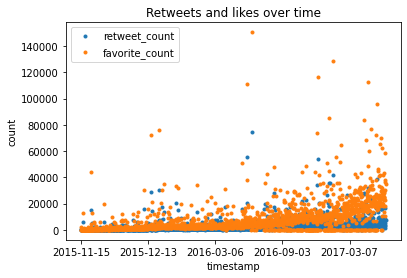

In [80]:
df_time_indexed = twitter_df.set_index('timestamp')
df_time_indexed[['retweet_count', 'favorite_count']].plot(alpha=2.0, style='.')
plt.xlabel('timestamp')
plt.ylabel('count')
plt.savefig('retweets_favorites_over_time.png')
plt.title('Retweets and likes over time');

#### We can see favorite count increase each year.

In [81]:
twitter_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_special,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,timestap
2355,666020888022790149,nan,nan,2015-11-15,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,nan,nan,NaT,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,NaN,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,443.0,2343.0,2015-11-15 22:32:08+00:00


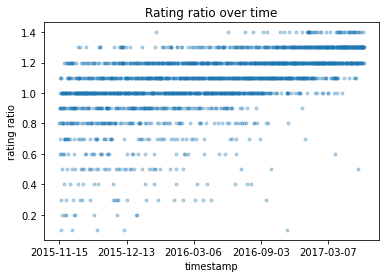

In [82]:
df_time_indexed ['rating_ratio'] = df_time_indexed ['rating_numerator'] / df_time_indexed ['rating_denominator']
df_time_indexed ['rating_ratio'].plot(alpha=0.3, style='.')
plt.xlabel('timestamp')
plt.ylabel('rating ratio')
plt.savefig('ratings_over_time.png')
plt.title('Rating ratio over time');

#### It shows rating ratio increases over time


In [83]:
twitter_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_special,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,timestap
2355,666020888022790149,nan,nan,2015-11-15,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,nan,nan,NaT,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,NaN,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,443.0,2343.0,2015-11-15 22:32:08+00:00
2354,666029285002620928,nan,nan,2015-11-15,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaT,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,41.0,118.0,2015-11-15 23:05:30+00:00


Let's check if the p1, p2, p3 affect the rating ratios¶

In [84]:
df_time_indexed.groupby('dog_special')['rating_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_special,,,,,,,,
doggo,89.0,1.160674,0.162101,0.5,1.100,1.20,1.3,1.4
floofer,4.0,1.225000,0.095743,1.1,1.175,1.25,1.3,1.3
pupper,256.0,1.071094,0.182210,0.3,1.000,1.10,1.2,1.4
puppo,34.0,1.217647,0.111384,0.9,1.200,1.20,1.3,1.4



The means in the above table seem to indicate a low rating ratio for "pupper" dog stage, but that might be affected by the low outliers and high number of them, however, the medians also indicate the same thing, so the outliers are not the problem, therefore, we can conclude that the "pupper" dog stage tends to get less rating ratios.

The "floofer" dog stage gets the highest rating ratios among other stages, with always getting higher than 10 rating ratio, but that also might be due to the very few number of dogs at this stage.

In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

4294967295

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

4294967295